<a href="https://colab.research.google.com/github/komal029/Stock-Price-Prediction/blob/main/Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/StockPred/Google_Stock_Price_Train.csv"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [ ]:
df = pd.read_csv(path)

In [ ]:
df

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


Text(0.5, 1.0, 'Fluctuation graph')

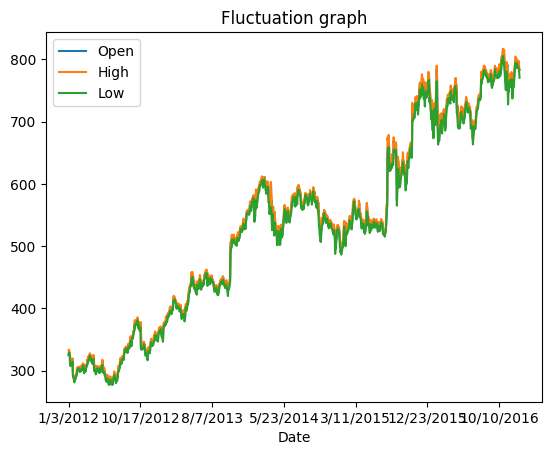

In [ ]:
# @title Stock Price Fluctuations

df.plot(x='Date', y=['Open', 'High', 'Low', 'Close'])
plt.title("Fluctuation graph")

In [ ]:
df.shape

(1258, 6)

#Linear regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
df['Volume'] = df['Volume'].str.replace(',', '').astype(float)

In [ ]:
df['Close'] = df['Close'].str.replace(',', '').astype(float)

In [ ]:
# Extracting features and target variable
X = df[['Open', 'High', 'Low', 'Volume']]  # Features
y = df['Close']  # Target variable (stock prices)

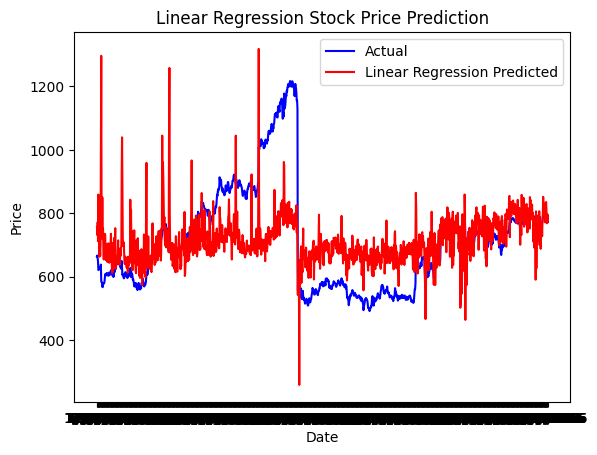

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Creating and training the linear regression model
lr_model = LinearRegression()
lr_model.fit(X, y)

# predictions
lr_predictions = lr_model.predict(X)

# Plotting the actual and predicted values
plt.plot(df['Date'], df['Close'], color='blue', label='Actual')
plt.plot(df['Date'], lr_predictions, color='red', label='Linear Regression Predicted')

# Adding title and labels
plt.title('Linear Regression Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()


In [ ]:
# Calculate Mean Squared Error (MSE)
lr_mse = mean_squared_error(y, lr_predictions)
print("Mean Squared Error:", lr_mse)
lr_rmse = np.sqrt(lr_mse)
print("Root mean square error:", lr_rmse)

Mean Squared Error: 21708.010018501674
Root mean square error: 147.33638389244413


#SVR MOdel

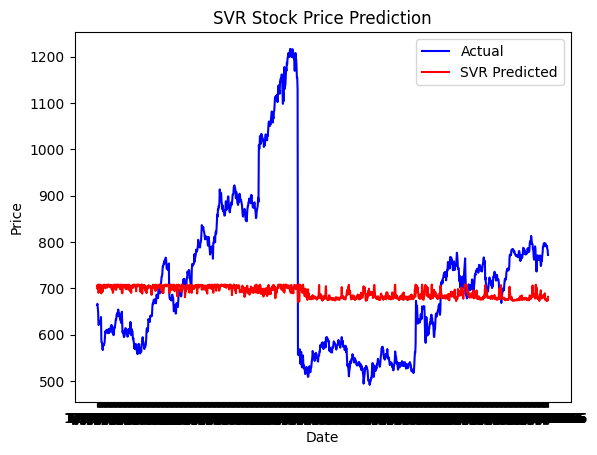

In [ ]:
from sklearn.svm import SVR

# Create and train the SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X, y)
# Make predictions
svr_predictions = svr_model.predict(X)

# Plotting the actual and predicted values
plt.plot(df['Date'], df['Close'], color='blue', label='Actual')
plt.plot(df['Date'], svr_predictions, color='red', label='SVR Predicted')

# Adding title and labels
plt.title('SVR Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()


In [ ]:
mse = mean_squared_error(y, svr_predictions)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("root mean square:", rmse)

Mean Squared Error: 26536.687353561745
root mean square: 162.90085129784234


#Random Forest

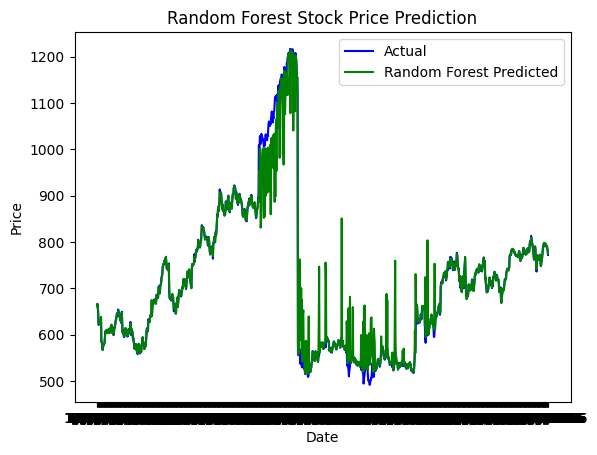

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Make predictions
rf_predictions = rf_model.predict(X)

# Plotting the actual and predicted values
plt.plot(df['Date'], df['Close'], color='blue', label='Actual')
plt.plot(df['Date'], rf_predictions, color='green', label='Random Forest Predicted')

# Adding title and labels
plt.title('Random Forest Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()


In [ ]:
rf_mse = mean_squared_error(y, rf_predictions)
print("Mean squared error: ",rf_mse)

rf_rmse = np.sqrt(rf_mse)
print("root mean square is: ", rf_rmse)

Mean squared error:  1190.5962663116293
root mean square is:  34.50501798741205


# Gradient Boosting Regressor:

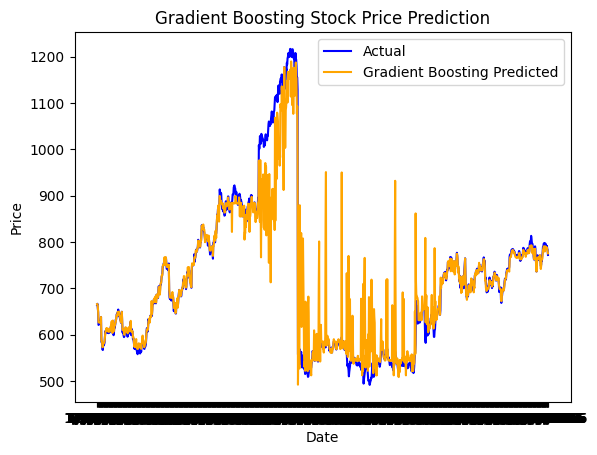

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and train the Gradient Boosting model
gb_model = GradientBoostingRegressor()
gb_model.fit(X, y)

# Make predictions
gb_predictions = gb_model.predict(X)

# Plotting the actual and predicted values
plt.plot(df['Date'], df['Close'], color='blue', label='Actual')
plt.plot(df['Date'], gb_predictions, color='orange', label='Gradient Boosting Predicted')

# Adding title and labels
plt.title('Gradient Boosting Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()


In [ ]:
gb_mse = mean_squared_error(y, gb_predictions)
print("mse: ", gb_mse)
gb_rmse = np.sqrt(gb_mse)
print("rmse: ", gb_rmse)

mse:  3378.708171835057
rmse:  58.126656293262364


# LSTM

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [ ]:
ts = df.iloc[:, 1:2].values
print(ts)

print(ts.shape)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
(1258, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_training_set = scaler.fit_transform(ts)

In [ ]:
scaled_training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
X_train = []
y_train = []

for i in range(60, 1258):
  X_train.append(scaled_training_set[i-60:i, 0])
  y_train.append(scaled_training_set[i, 0])

X_train = np.array(X_train)
y_train = np.array(y_train)


In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 70, return_sequences= True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 40))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

#first values, 60, 50, 60, 40

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 500, batch_size = 36)

Epoch 1/500
34/34 [==============================] - 12s 117ms/step - loss: 0.0530
Epoch 2/500
34/34 [==============================] - 4s 106ms/step - loss: 0.0076
Epoch 3/500
34/34 [==============================] - 4s 123ms/step - loss: 0.0056
Epoch 4/500
34/34 [==============================] - 5s 136ms/step - loss: 0.0055
Epoch 5/500
34/34 [==============================] - 4s 106ms/step - loss: 0.0049
Epoch 6/500
34/34 [==============================] - 4s 105ms/step - loss: 0.0050
Epoch 7/500
34/34 [==============================] - 5s 149ms/step - loss: 0.0052
Epoch 8/500
34/34 [==============================] - 4s 105ms/step - loss: 0.0047
Epoch 9/500
34/34 [==============================] - 4s 105ms/step - loss: 0.0048
Epoch 10/500
34/34 [==============================] - 4s 125ms/step - loss: 0.0042
Epoch 11/500
34/34 [==============================] - 4s 125ms/step - loss: 0.0050
Epoch 12/500
34/34 [==============================] - 4s 107ms/step - loss: 0.0043
Epoch 13/500

In [ ]:
dataset_test_path = "/content/drive/MyDrive/StockPred/Google_Stock_Price_Test.csv"

In [ ]:
dataset_test = pd.read_csv(dataset_test_path)

In [ ]:
actual_stock_price = dataset_test.iloc[:,1:2].values

In [ ]:
dataset_total = pd.concat((df['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total)- len(dataset_test)-60:].values

In [ ]:
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60, 80):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


In [ ]:
predicted_price = regressor.predict(X_test[-1:])[0][0]
print(f"Predicted closing price for the next day: {predicted_price}")

1/1 [==============================] - 0s 35ms/step
Predicted closing price for the next day: 0.9635013341903687


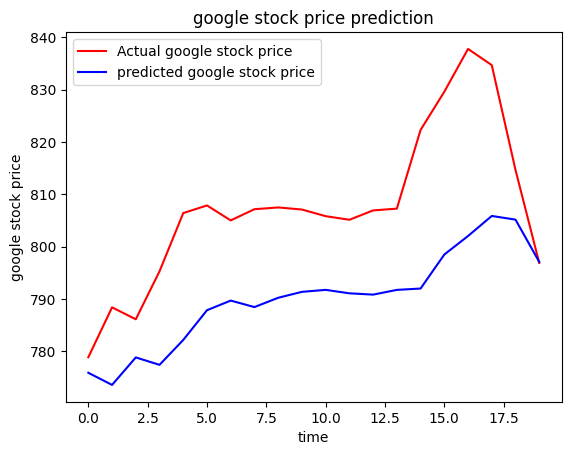

In [ ]:
plt.plot(actual_stock_price, color = 'red', label = 'Actual google stock price')
plt.plot(predicted_stock_price, color = 'blue', label = 'predicted google stock price')
plt.title('google stock price prediction')
plt.xlabel('time')
plt.ylabel('google stock price')
plt.legend()